# Sales dynamics analysis 


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_excel('rnd_contest_data.xlsx', sheet_name="REF raw data", 
                   usecols=['Source',"Brand", "Model", "Month", "Sales Units","PRICE UAH/UN.", "ENERGY LABEL EU"])
data_traditional = df[df["Source"] == "Traditional Sales"]
internet_sales = df[df["Source"] == "Internet Sales"]

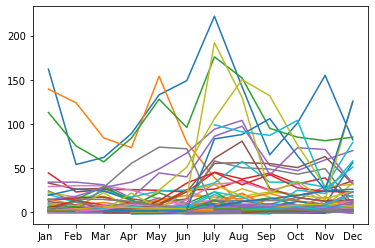

In [6]:
def dynamics_anal(brand_name, data=data_traditional):
    brand_data = data[data["Brand"] == brand_name]
    models = brand_data['Model'].unique()
    for el in models:
        s = pd.DataFrame(data=brand_data[brand_data["Model"] == el], columns=["Month", "Sales Units"])
        plt.plot(s.iloc[:, 0], s.iloc[:, 1])
    plt.show()

dynamics_anal("BEKO", data_traditional)

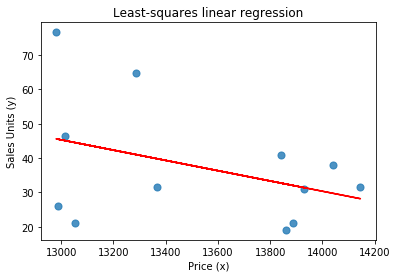

In [7]:
def elasticity_estimation(brand_name, model, data):
    from sklearn.linear_model import LinearRegression

    brand_data = data[data["Brand"] == brand_name]
    s = pd.DataFrame(data=brand_data[brand_data["Model"] == model],
                     columns=["Sales Units", "PRICE UAH/UN."])

    linreg = LinearRegression().fit(s.iloc[:, [1]], s.iloc[:, [0]])
    plt.scatter([s["PRICE UAH/UN."]],[s["Sales Units"]], marker='o', s=50, alpha=0.8)
    plt.plot(s.iloc[:, [1]], (linreg.coef_[0] * s.iloc[:, [1]] + linreg.intercept_ ), 'r-')
    plt.title('Least-squares linear regression')
    plt.xlabel('Price (x)')
    plt.ylabel('Sales Units (y)')
    plt.show()

elasticity_estimation("LG", 'GA-B429SECZ', internet_sales)

In [13]:

def elasticity_brand(brand_name, data):
    from sklearn.linear_model import LinearRegression
    brand_data = data[data["Brand"] == brand_name]
    models = brand_data['Model'].unique()
    elast = []
    for mod in models:
        elas = pd.DataFrame(data=brand_data[brand_data["Model"] == mod],
                            columns=["Sales Units", "PRICE UAH/UN."])
        sales = elas["Sales Units"]
        if len(sales)>6:
            X = elas.iloc[:,[1]]
            y = elas.iloc[:,[0]]
            linreg = LinearRegression().fit(X, y)
            elast.append(linreg.coef_[0][0])
    print('Elasticity for brand: {:.4f}'.format(np.mean(elast)))

In [14]:

elasticity_brand("SAMSUNG", df)

Elasticity for brand: -0.0045


In [12]:
def elasticity_enerdgy_class(class_energy, data):
    from sklearn.linear_model import LinearRegression
    energ_data = data[data["ENERGY LABEL EU"] == class_energy]
    models = energ_data['Model'].unique()
    elast = []
    for mod in models:
        elas = pd.DataFrame(data=energ_data[energ_data["Model"] == mod],
                            columns=["Sales Units", "PRICE UAH/UN."])
        sales = elas["Sales Units"]
        if len(sales)>6:
            X = elas.iloc[:,[1]]
            y = elas.iloc[:,[0]]
            linreg = LinearRegression().fit(X, y)
            elast.append(linreg.coef_[0][0])
    print('Elasticity for model: {:.4f}'.format(np.mean(elast)))

elasticity_enerdgy_class("A", data_traditional)


Elasticity for model: -0.0190
